# **Capstone project: Providing data-driven suggestions for HR**

## Description 

This capstone project showcases my learning from the Advanced Google Data Analytics course. I will analyse a dataset and build  a predictive model that can provide insights to the Human Resources (HR) department of a large (fictional) consulting firm.
The model will specifically be built to predict whether or not an employee will leave the company. Besides this, the notebook will include relevant exploratory analysis and data preparation, model evaluation and interpretation and data visualisations. Any ethical considerations, methodology and resources used will also be reported. 



# **PACE stages**


## **Pace: Plan**

### Introduction to the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. In this scenario, they have asked a data analyst to provide data-driven suggestions based on their understanding of the data. They have the following question: 

* ***what’s likely to make the employee leave the company?***

This projectg will analyse the data collected by the HR department and build a model that predicts whether or not an employee will leave the company. This may enable to identify factors that contribute to employee exit. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Initial exploration of the dataset

The analyst has been provided with a dataset containing 15,000 rows and 10 columns for the variables listed below.
The dataset has been sourced from  [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

### Step 1. Import packages and load in the data

*   Import packages
*   Load dataset



#### Import packages

In [15]:
# Import packages

# Data manipulation packages
import numpy as np
import pandas as pd

# Data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for preprocessing, modelling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Packages for valuation and visualisation
from sklearn import metrics
from sklearn.tree import plot_tree

# Package for storing models
import pickle

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* Most of the data is already numeric. 
* There are two categorical data columns that will need to be encoded: `Department` and `Salary`.
* There are no null values in the data
* Column namings are inconsistent

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include="all")


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

Column names are standardised so that they are all in `snake_case`, correctly spelled and more concise where applicable. 

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={"average_montly_hours" : "average_monthly_hours",
                          "time_spend_company" : "tenure",
                          "Work_accident" : "work_accident", 
                          "Department" :"department"})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

As predicted earlier, there are no missing values in the data. 

### Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

There are $3008$ duplicated rows in the dataset. This is about $20\%$ of the data. It is very unlikely that two employees will report the exact same numbers across all of the variables in this dataset. Therefore, these duplicates will be removed. 

In [9]:
# Inspect some rows containing duplicates 
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable 
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe 
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

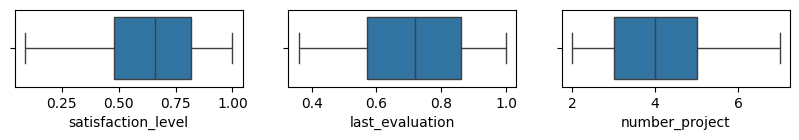

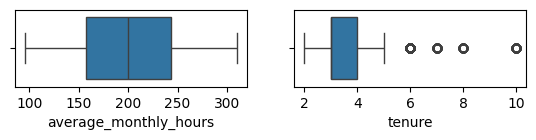

In [11]:
# Create boxplots to determine if there are any outliers
fig, axes = plt.subplots(1,3, figsize=(10,1))
sns.boxplot(x=df1['satisfaction_level'], ax=axes[0])
sns.boxplot(x=df1['last_evaluation'], ax=axes[1])
sns.boxplot(x=df1['number_project'], ax=axes[2])
plt.show()

fig, axes = plt.subplots(1,2, figsize=(6.6,1))
sns.boxplot(x=df1['average_monthly_hours'], ax=axes[0])
sns.boxplot(x=df1['tenure'], ax=axes[1])
plt.show()

By visual inspection, it appears that there are several outlier values in the tenure column. Their relative frequency can be visualised with a histogram. 

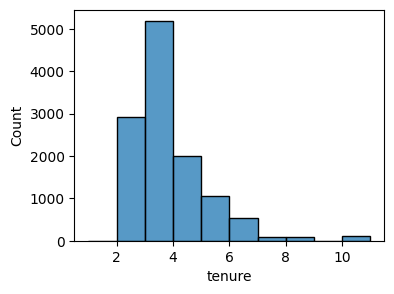

In [81]:
# Plot hist
plt.figure(figsize=(4,3))
sns.histplot(x=df1['tenure'], binwidth=1, binrange=(1,11));

In [12]:
# Determine the number of rows containing outliers

def find_outlier_rows(df): 
    '''
    takes as an argument a df or a column within a df
    computes the 25th percentile (q1), the 75% percentile (q3) and the interquartile range (iqr)
    returns the rows which have outliers
    '''
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    outliers_row = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return outliers_row

# Return how many outlier rows there are in the dataset
find_outlier_rows(df1['tenure']).shape[0]

824

It looks like the `tenure` column contains 824 outlier rows. As some of the models implemented below are not robust to outliers, these will have to be inspected and removal considered.

# pAce: Analyze 
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Understanding how many employees left and what percentage of all employees this figure represents.

In [83]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts().reset_index()

,left,count
0,0,10000
1,1,1991


In [84]:
# Get proportions of people who left vs. stayed
df1['left'].value_counts(normalize=True).reset_index()

,left,proportion
0,0,0.833959
1,1,0.166041


~$~17\%$ of employees in the dataset have left the company. 

### Data visualizations

Next, plots were created to visualise and examine the characteristics of retained and churned employees, and examine the relationships between the variables in the  data.

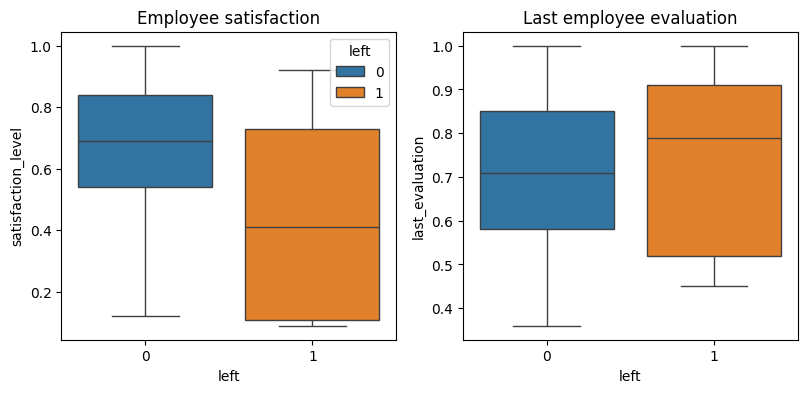

In [85]:
# Plot satisfaction level and evaluation for churned vs retained employees

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1,2, figsize=(9.5,4))

# Plot 1
sns.boxplot(data=df1,
            x='left',
            y='satisfaction_level',
            hue ='left',
            ax=axes[0])
sns.move_legend(axes[0], "upper right")
axes[0].set_title('Employee satisfaction')

# Plot 2
sns.boxplot(data=df1, x='left', 
            y='last_evaluation',
            hue ='left',
            legend=False,
            ax=axes[1])
axes[1].set_title('Last employee evaluation')
plt.show()


Text(0.5, 1.0, 'Histogram: Employee satisfaction')

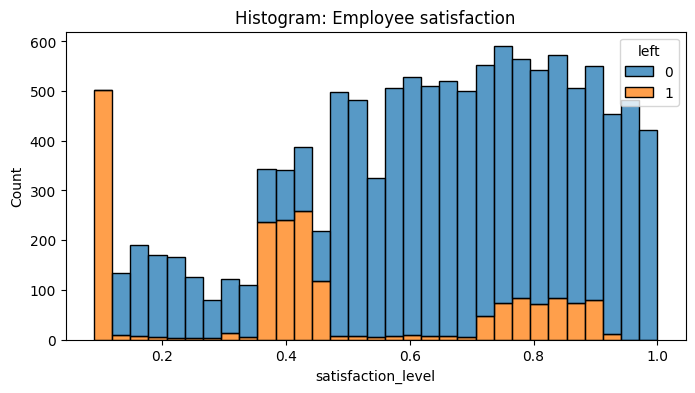

In [86]:

plt.figure(figsize=(8,4))
sns.histplot(x=df1['satisfaction_level'], 
             hue=df1['left'],
             multiple='stack')
plt.title("Histogram: Employee satisfaction")

Unsuprisingly, employees who churned appear to have considerably lower median reported satisfaction levels than those who were retained. A propoportion of employees had medium to low satisfaction. Interestingly, there is a third population of employees who left despite having high satisfaction scores. 

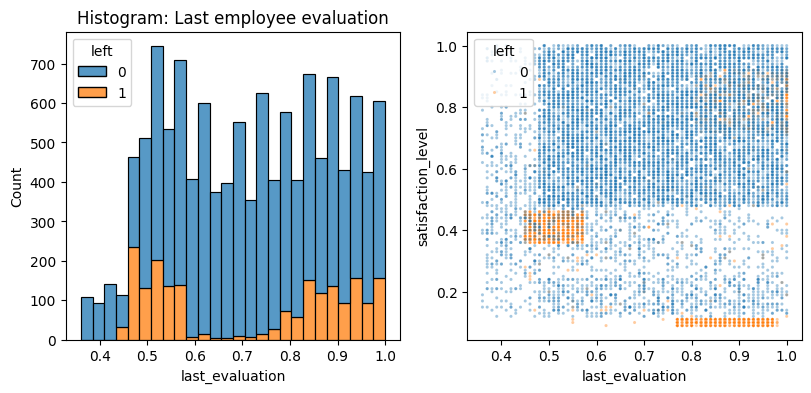

In [87]:
# Explore employee evaluation
fig, axes =plt.subplots(1, 2, figsize=(9.5, 4))

sns.histplot(x=df1['last_evaluation'], 
             hue=df1['left'],
             multiple='stack',
             ax=axes[0])
axes[0].set_title("Histogram: Last employee evaluation")

sns.scatterplot(data=df1,
                x=df1['last_evaluation'],
                y=df1['satisfaction_level'],
                hue=df1['left'],
                alpha=0.4,
                s=5);
                        
    

Based on the employee satisfaction and last evaluation levels, it appears that there are three distinct subgroups of employees who left: Those with average satisfaction and performance evaluation, those with high evaluation and low satisfaction, and those with both high valuation and satisfaction. Further analysis should be conducted to determine if distinct factors influence why these three groups of employeed leave the company. 

**Note** that there are clear boundries between these types of groups, which indicates data manipulation or usage of synthetic data. 

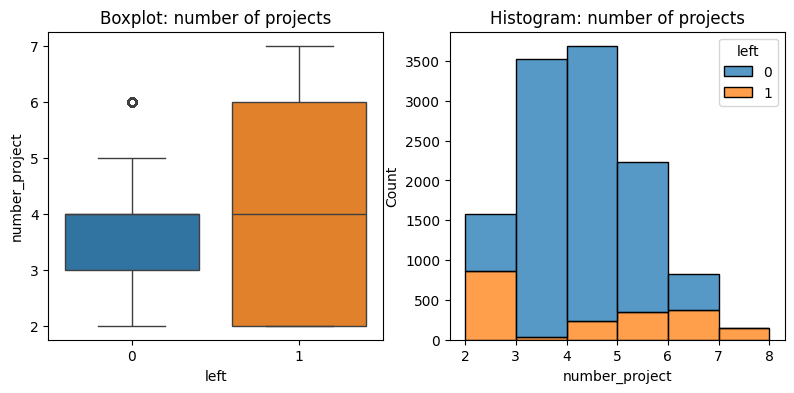

In [88]:
# Explore number of projects contributed to vs employee churn.
fig, axes = plt.subplots(1,2, figsize=(9.5,4))

# Plot 1
sns.boxplot(data=df1,
            x='left',
            y='number_project',
            hue='left',
            legend=False,
            ax=axes[0])
axes[0].set_title('Boxplot: number of projects')

# Plot 2
sns.histplot(data=df1,
            x='number_project',
            hue='left',
            binwidth=1,
            binrange=(2,8),
            multiple="stack",
            ax=axes[1])
axes[1].set_title('Histogram: number of projects')
plt.show()

From this figure, it looks like approximately half of employees who contributed to either only 2 projects, or to 6 or more projects, churned. It seems that there is an optimal number of projects which is associated with greater employee retention. This will have to be explored further. 

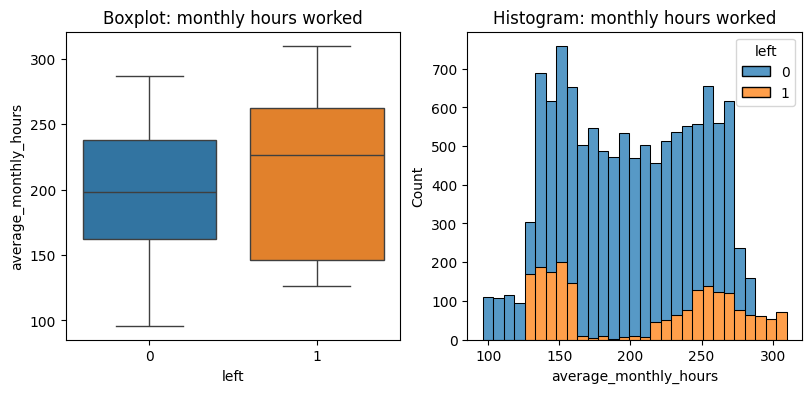

In [89]:
# Explore average monthly hours
fig, axes = plt.subplots(1,2, figsize=(9.5,4))

sns.boxplot(data=df1,
            x='left',
            y='average_monthly_hours',
            hue='left',
            legend=False,
            ax=axes[0])
axes[0].set_title('Boxplot: monthly hours worked')

sns.histplot(data=df1,
            x='average_monthly_hours',
            hue='left',
            multiple="stack",
            ax=axes[1])
axes[1].set_title('Histogram: monthly hours worked')
plt.show()


Employees who churned appeared to be stratified in two distinct categories, those who work ~150 hours, and those who worked on average about 250 or more hours. It will be important to explore further the relationship between hours worked and employee churn.  

<Axes: xlabel='number_project', ylabel='average_monthly_hours'>

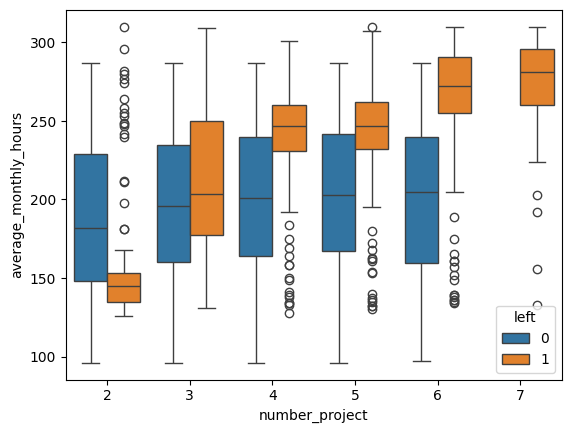

In [90]:
# Explore the relationship between the number of projects and worked hours for
# retained and churned employees

sns.boxplot(data=df1, 
            x="number_project", 
            y="average_monthly_hours",
            hue="left")

Summary of insights at this stage of EDA: 

* The number of average monthly hours worked increases as the number of projects involved in increases. It makes sense that employees who contribute to more projects log in more hours. 

* This data validates that there are at least two types of grups among the churned employees: (A) Those who worked considerably fewer hours than the retained employees involved in the same number of projects, and (B) those churned employees who worked considerably more hours than their retained peers. it is possible that employees in group A were fired or assigned to fewer projects as they had given in the notice. It is reasonable to assume that employees who worked considerably more than their peers likely quit their job at Salisford Motors. 

* All the employees who worked on 7 projects churned. Most of these employees have worked more than ~250-300 hours, much more than any other group. This is considerably more than the esitimated average of ~140 hours a month (assuming 4 weeks at 40 hrs a week).

* As visualised above, there seems to be an optimal number of projects to work on to favour retention: 3-4 projects. Only a small number of employees have churned in these categories. 

In [13]:
# Confirm that all employees who worked on 7 projects have churned
df1[df1['number_project'] == 7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

<Axes: xlabel='number_project', ylabel='satisfaction_level'>

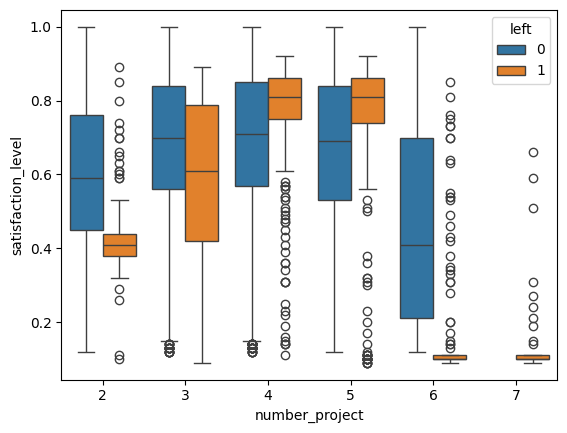

In [92]:
# Explore the relationship between number of projects and employee satisfaction

sns.boxplot(data=df1,
                x=df1['number_project'],
                y=df1['satisfaction_level'],
                hue=df1['left'])

* Churned employees who had worked on either 2 or 6 projects had considerably lower satisfaction levels than their retained peers. 
* The median satisfaction of employees who worked on 3-5 projects is not consistently affected. 
* When employees are involved in 6 or more projects, satisfaction is also low for retained employees.
* Further statistical analysis would have to be performed to determine if the differences are siginificant. 

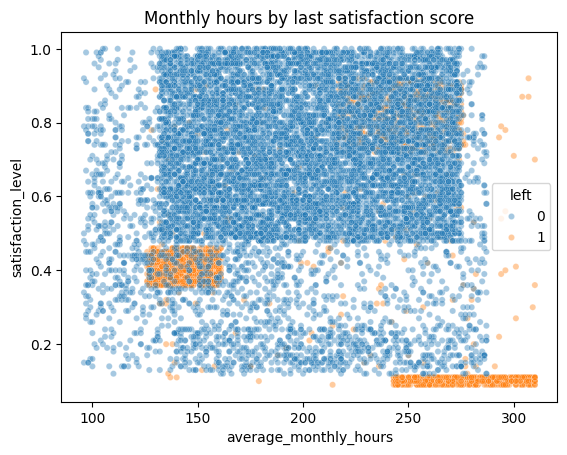

In [93]:
# Explore the relationship between number of hours worked and employee  
# satisfaction

sns.scatterplot(data=df1,
                x=df1['average_monthly_hours'],
                y=df1['satisfaction_level'],
                hue='left',
                alpha=0.4,
                s=20)
plt.title('Monthly hours by last satisfaction score');

As in the satisfaction vs employee valuation scatter plot, there are three distinct groups of employees: 

* There was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

* Another group of churned employees had a low satisfaction score of about 0.4 despite working normal hours. Other factors could have influenced  why these employees left. 

* A third group of churned employee worked ~210-280 hours per month, while still having satisfaction levels ranging ~0.7-0.9. It is as of yet unclear at the moment why these employees left.  

**Note** the shape of the distributions here, with clear rectangular bounderies defined. This is likely an indicative of data manipulation or synthetic data. 

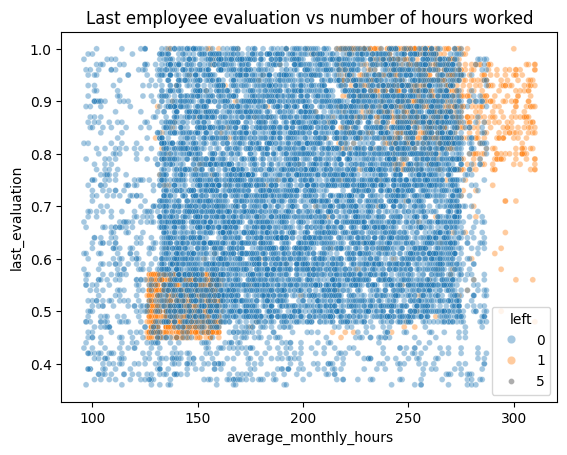

In [94]:
# Explore the relationship between last evaluation and average monthly hours
sns.scatterplot(data=df1,
                x=df1['average_monthly_hours'],
                y=df1['last_evaluation'],
                hue=df1['left'],
                alpha=0.4,
                size=5)
plt.title("Last employee evaluation vs number of hours worked")
plt.show()

This plot suggests there are two distinct subgroups of churned employees: Those who worked long hours and had a high evaluation score, and thos who worked towards the lower end of the hour distribution, who had poor evaluation scores. 

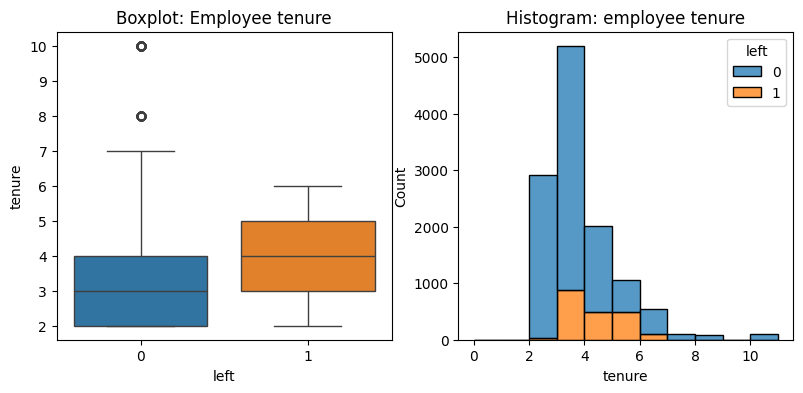

In [95]:
# Explore effect of tenure on employee churn
fig, axes = plt.subplots(1,2, figsize=(9.5,4))

sns.boxplot(data=df1,
            x='left',
            y='tenure',
            hue='left',
            legend=False,
            ax=axes[0])
axes[0].set_title('Boxplot: Employee tenure')

sns.histplot(data=df1,
            x='tenure',
            hue='left',
            multiple="stack",
            binwidth=1,
            binrange=(0,11),
            ax=axes[1])
axes[1].set_title('Histogram: employee tenure')
plt.show()

* The dataset has no information on employees who have worked fewer than 2 years in the company. 
* Detectable employee churn seems to occur after 3 years in employment. From visual inspection of the histogram, it looks like once company tenure reaches 5 years, half of the tenured employees are leaving. 
* There are very few employees who have been at the company for 7 years or more. 

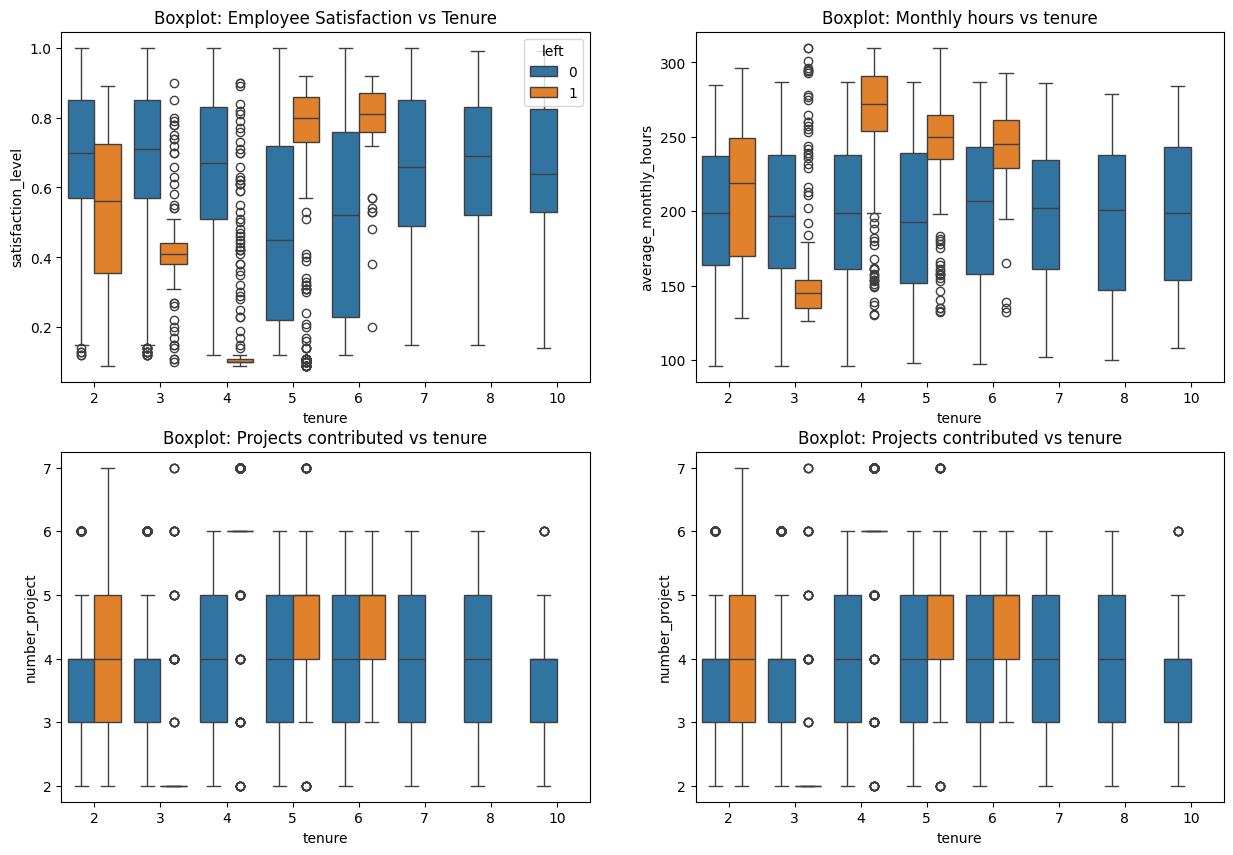

In [96]:
# Explore further the effect of tenure

# Set figure and axes
fig, ax = plt.subplots(2, 2, figsize = (15,10))

# Plot 1
sns.boxplot(data=df1, 
            x=df1['tenure'],
            y=df1['satisfaction_level'],
            hue=df1['left'],
            ax=ax[0,0]
            )
ax[0,0].set_title("Boxplot: Employee Satisfaction vs Tenure")

# Plot 2 
sns.boxplot(x=df1['tenure'],
             y=df1['average_monthly_hours'],
             hue=df1['left'],
             ax=ax[0,1],
             legend=False)
ax[0,1].set_title('Boxplot: Monthly hours vs tenure')

# Plot 3 
sns.boxplot(x=df1['tenure'],
             y=df1['number_project'],
             hue=df1['left'],
             ax=ax[1,0],
             legend=False)
ax[1,0].set_title('Boxplot: Projects contributed vs tenure')

# PLot 4
sns.boxplot(x=df1['tenure'],
             y=df1['number_project'],
             hue=df1['left'],
             ax=ax[1,1],
             legend=False)
ax[1,1].set_title('Boxplot: Projects contributed vs tenure');


* Employee statisfaction for those employees who left the company after 2-4 years in employment was considerably lower. 
* Average worked hours spike for employees who left the company after 4-6 years, vs those who stayed. The 4th year tenure appears to be significant in that worked hours increased for churned employees are significantly above average, and at the same time employee satisfaction plummets. 

**Overall:**
* There appears to be 2-3 distinct subgroups of employees who left. A decsion tree based approach would help understanding the most important features that shape employee exit. 

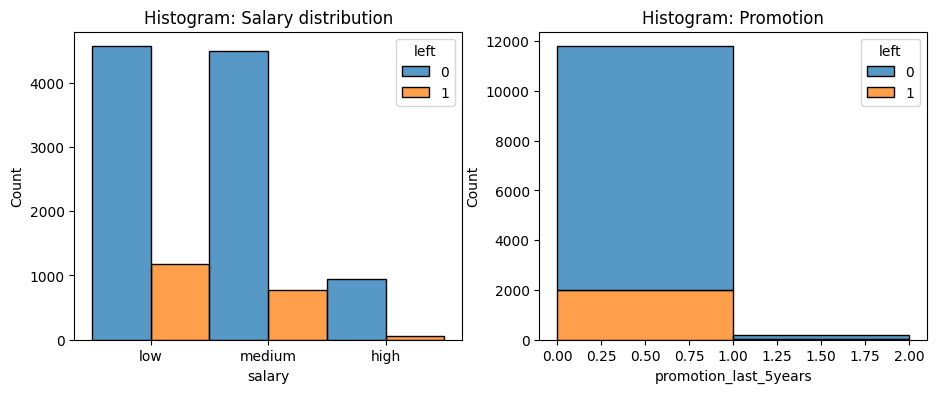

In [97]:
# explore the effect of salary compensation and promotion in employee churn
fig, ax = plt.subplots(1,2, figsize=(11,4))

# Plot 1: Salary distribution
sns.histplot(data=df1,
            x=df1['salary'],
            hue=df1['left'],
            multiple='dodge',
            ax=ax[0])
ax[0].set_title('Histogram: Salary distribution')

# Plot 2: Promotion distribution
sns.histplot(data=df1,
            x='promotion_last_5years',
            hue='left',
            binrange=(0,2),
            binwidth=1,
            multiple='stack',
            ax=ax[1])
ax[1].set_title('Histogram: Promotion');

* The salary distribution appears similar for those employees who are retained and those who churn. As a proportion, more churned employees appear to have a low salary, compared to retained employees (>50% for churned employees, <50% for retained employees)
* Very few employees with high salary churn. 
* Most employees in the dataset have not been promoted. 
* A relatively negligible number of employees who have received a promotion in the last 5 years appear to have left the company. 

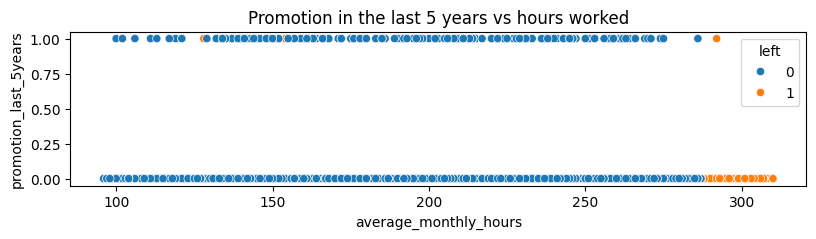

In [98]:
plt.figure(figsize=(9.5,2))
sns.scatterplot(data=df1,
                x=df1['average_monthly_hours'],
                y=df1['promotion_last_5years'],
                hue=df1['left'],)
plt.title('Promotion in the last 5 years vs hours worked');


* The figure below shows again that many employees who left had worked the longest hours without receiving a promotion. 

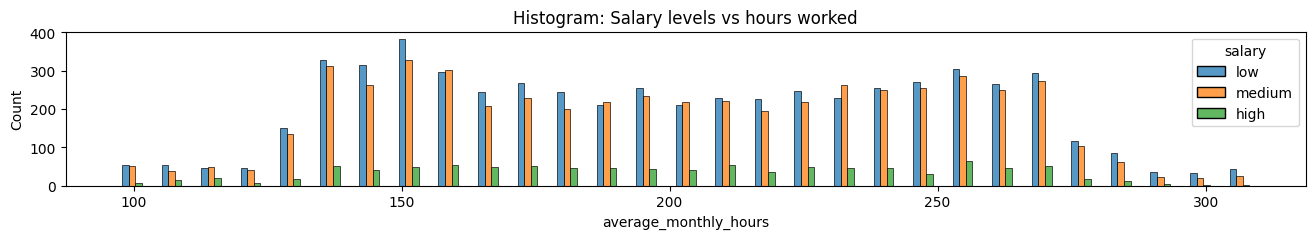

In [99]:
plt.figure(figsize=(16,2))
sns.histplot(data=df1,
                x=df1['average_monthly_hours'],
                hue=df1['salary'],
                multiple='dodge',
                shrink=0.5)
plt.title('Histogram: Salary levels vs hours worked');

There apears to be little correlation between the salary level and the number of hours worked. 

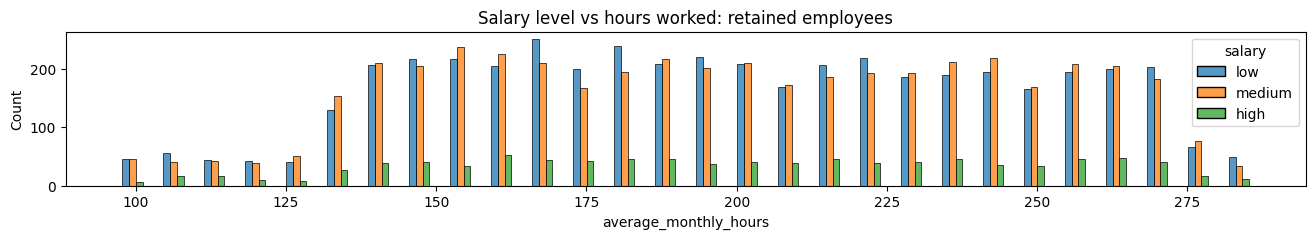

In [100]:
plt.figure(figsize=(16,2))
sns.histplot(data=df1[df1['left']==0],
                x='average_monthly_hours',
                hue='salary',
                multiple='dodge',
                shrink=0.5)
plt.title('Salary level vs hours worked: retained employees');

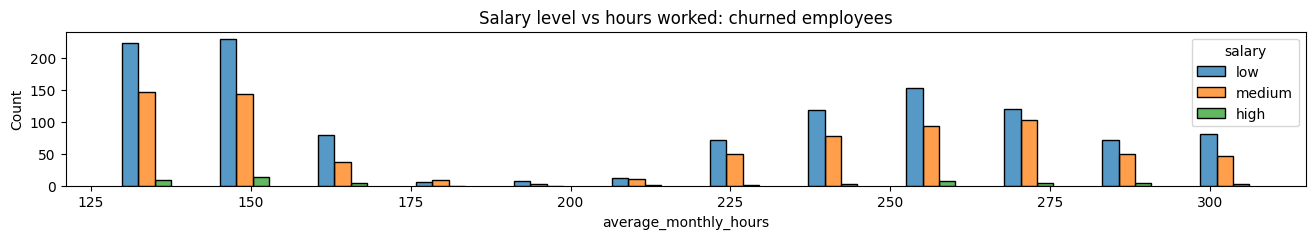

In [101]:
plt.figure(figsize=(16,2))
sns.histplot(data=df1[df1['left']==1],
                x='average_monthly_hours',
                hue='salary',
                multiple='dodge',
                shrink=0.5)
plt.title('Salary level vs hours worked: churned employees');

It appears that, when comparing employees who work long hours, those who leave the company have again a higher proportion of workers on low salary relative to the retained employees. 

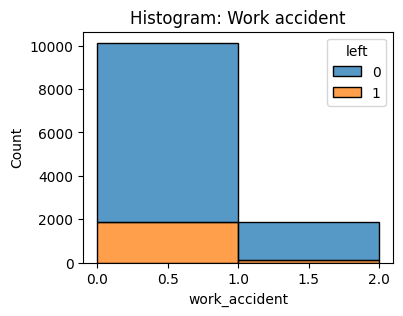

In [102]:
# Work accident exploration
plt.figure(figsize=(4,3))
sns.histplot(data=df1,
            x=df1['work_accident'],
            hue='left',
            binwidth=1,
            binrange=(0,2),
            multiple='stack')
plt.title('Histogram: Work accident');

Most employees who have had a work accident are retained by the company. 

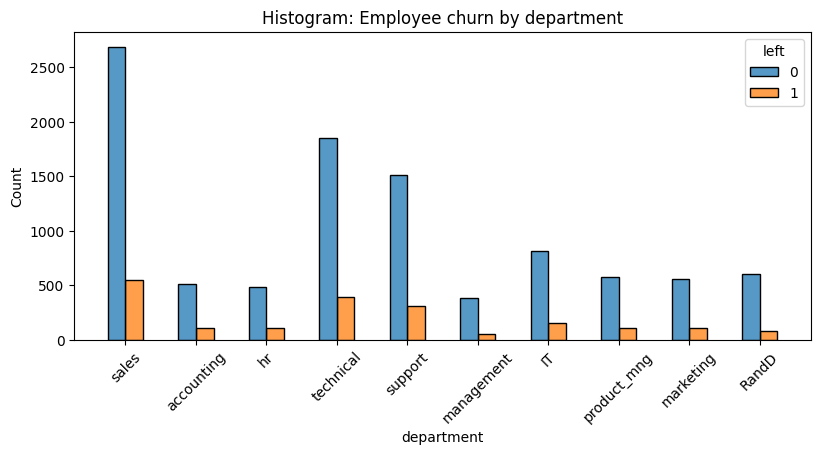

In [103]:
# Churn rates by department
plt.figure(figsize=(9.5,4))
sns.histplot(data=df1,
         x=df1['department'],
         hue=df1['left'],
         multiple='dodge',
         shrink = 0.5)
plt.xticks(rotation=45)
plt.title('Histogram: Employee churn by department');

All departments have similar proportion of employees who left. 

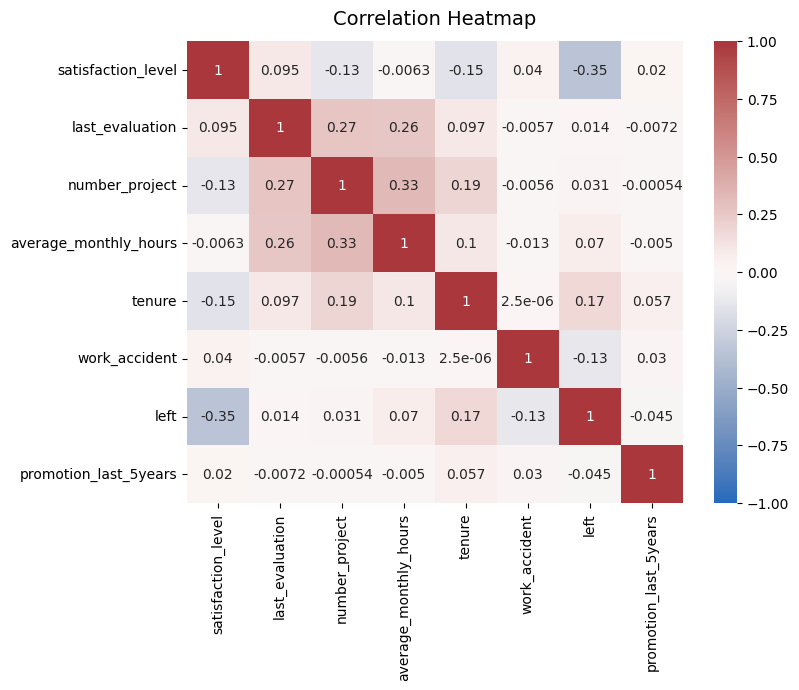

In [104]:
# Plot a feature correlation heatmap
plt.figure(figsize=(8, 6))
df2 = df1.copy()
df2 = df2.drop(columns=['department', 'salary'])
heatmap = sns.heatmap(df2.corr(), 
                      vmin=-1,
                      vmax=1, 
                      annot=True, 
                      cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

Several factors influence why employees are leaving have one or more of the following characteristics:
* Working long hours
* Working on too many projects
* Poor employee satisfaction
* Poor employee evaluation
* Long tenure
* Have not been promoted

Based on this initial exploratory analysis, it would appear that many workers are simply burnt out.

# paCe: Construct Stage

At this stage I will perform the following: 

- Determine which models are most appropriate
- Construct models
- Confirm model assumptions
- Evaluate models results to determine how well your model fits the data


## Model Building; Results and Evaluation

Tasks:
- Fit several types of models that predict the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model
- Select champion model

**Identification of the type of prediction task:**

The goal of this project is to predict whether the employee will leave the company, based on the available data variables. This is a typical binary classification model into the categories "left" = 1 if the employee left, and 0 if they are still in the company. 

**Identifying the types of models most appropriate for this task:**

There are two types of modelling that will fit this binary classification: logistic regression of a decision tree based machine learning model. Both will be implemented and assessed below. 

### Modeling approach #1: A logistic regression model.

##### Recalling model assumptions
**Logistic Regression model assumptions**
- Outcome variable is categorical
-  Linearity: There should be a linear relationship between each X variable and the logit of the probability that y=1, such that: 
$$
\text{logit}(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1X_1 + \cdots + \beta_nX_n
$$
- Observations are independent of each other
- No extreme outliers
- No severe multicollinearity among X variables
- Sufficiently large sample size


Before proceeding with the modelling, the data needs to be prepared. Categorical variables need to be encoded:

In [19]:
# Copy the dataframe to encode data: 
df1_enc = df1.copy()

# Encode ordinal salary variable:
df1_enc['salary'] = (
     df1_enc['salary'].astype('category')
     .cat.set_categories(["low", "medium", "high"])
     .cat.codes
)

df1_enc['salary'].value_counts()

salary
0    5740
1    5261
2     990
Name: count, dtype: int64

In [20]:
# Encode department variable
df1_enc = pd.get_dummies(df1_enc, dtype=int, drop_first=False)
df1_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


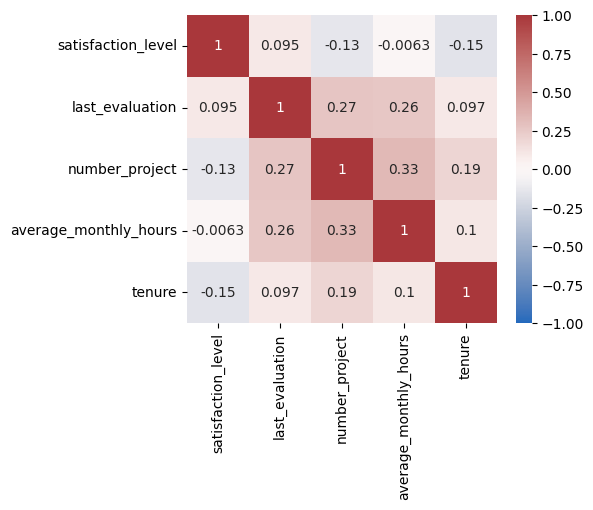

In [107]:
# Re-test for multicolinearity
plt.figure(figsize=(5,4))
heatmap1 = sns.heatmap(data=df1_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True, 
                       vmin=-1,
                       vmax=1,
                       cmap=sns.color_palette("vlag", as_cmap=True))



There is no high correlation between the variables in this dataset, though a weak correlation exists between average monthly hours, last evaluation and number of projects. 

Logistic regression is sensitive to outliers in the data. During the exploratory stage, outiliers were identified in the tenure column.

In [108]:
# Remove outliers from  tenure column and verify 

df1_logreg = df1_enc.copy()

q1 = df1_logreg['tenure'].quantile(0.25)
q3 = df1_logreg['tenure'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
df1_logreg = df1_logreg[(df1_logreg['tenure'] >= lower_limit) & (df1_logreg['tenure'] < upper_limit)]
df1_logreg['tenure'].value_counts()


tenure
3    5190
2    2910
4    2005
5    1062
Name: count, dtype: int64

In [109]:
# Isolate outcome and features
y = df1_logreg['left']
X = df1_logreg.copy()
X = X.drop(columns=['left'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   tenure                  11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   promotion_last_5years   11167 non-null  int64  
 7   salary                  11167 non-null  int8   
 8   department_IT           11167 non-null  int64  
 9   department_RandD        11167 non-null  int64  
 10  department_accounting   11167 non-null  int64  
 11  department_hr           11167 non-null  int64  
 12  department_management   11167 non-null  int64  
 13  department_marketing    11167 non-null  int64  
 14  department_product_mng  11167 non-null  int

Recall that the data is imbalanced, with an 83% of employees retained and 17% churned. This is an ok split but it's best to stratify the outcome variable between the train and test splits.

In [24]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    stratify=y,
                                                    test_size=0.25, random_state=42)

In [111]:
# Build a classifier and fit model to the data
# (Instantiate, then fit the model)
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train,y_train)

# Predict y data 
y_pred = log_clf.predict(X_test)

### Model evaluation

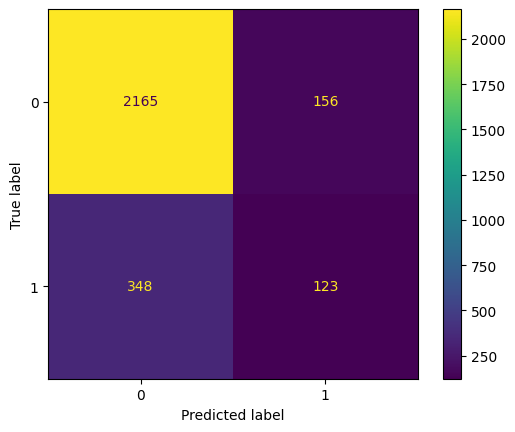

In [112]:
# Compute values for confusion matrix
log_cm = metrics.confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

A perfect model would yield all true negatives and true positives, and no false negatives or false positives. False positives are people predicted to leave who in fact stay. False negatives are people who are predicted to stay but are in fact going to leave. Based on this model, the majority of people who leave (1, n = 348 + 123) are in fact still predicted to stay (0, n = 348). 

**Create a classification score report:**

In [113]:
outcome_names = ['Predicted to stay', 'Predicted to leave']
log_reg_report = metrics.classification_report(y_true=y_test, y_pred=y_pred, target_names=outcome_names)
print(log_reg_report)

                    precision    recall  f1-score   support

 Predicted to stay       0.86      0.93      0.90      2321
Predicted to leave       0.44      0.26      0.33       471

          accuracy                           0.82      2792
         macro avg       0.65      0.60      0.61      2792
      weighted avg       0.79      0.82      0.80      2792



**Model interpretation:**

The model has good metrics for predicting people to stay. However, the goal of the model is to accurately predict when employees will churn. In this case, precision (precision = 0.44), recall (recall = 0.26) and f1 (f1 = 0.33) are all low and indicate the mdoel performs poorly. 

### Modeling approach #2: A decision tree based model.

This modelling approach will include a traditional decision tree as well as a random forest approach. Decision trees are flow-chart-like supervised classification tasks. Random forest are a specific type of ensamble of multiple decision trees. Decision trees split nodes on the criterion that minimises the impurity of their resulting children, that is mixture respect to class. Default criterion for splititng is Gini impurity. 

**Recalling decision tree model considerations:**
* Require no assumption regarding the distribution of the data
* Can easily handle colinearity
* Often do not require data preprocessing such as scaling or removal of outliers
* Decision trees are transparent
* Particularly susceptible to overfitting


In [21]:
# Isolate outcome and features 
y = df1_enc['left']

X = df1_enc.copy()
X = X.drop(['left'], axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [115]:
# Split the data into training and test sets. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=0
    )

### Decision tree #1 - no feature egineering

In [116]:
# Instantiate decsion tree
dec_tree1 = DecisionTreeClassifier(random_state=0)

# Create a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
            }

# Create a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 
           'precision': 'precision_macro',  
           'recall': 'recall_macro', 
           'f1': 'f1_macro', 
           'roc_auc' : 'roc_auc'
           } 

# Instantiate grid search
tuned_tree1 = GridSearchCV(dec_tree1, param_grid=cv_params, scoring=scoring, cv=5, refit='roc_auc')


Fit the decision tree to the training data using criteria above

In [117]:
%%time
# Tune the tree 
tuned_tree1.fit(X_train, y_train)

CPU times: user 3.78 s, sys: 0 ns, total: 3.78 s
Wall time: 3.78 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_macro',
                      'precision': 'precision_macro', 'recall': 'recall_macro',
                      'roc_auc': 'roc_auc'})

In [118]:
# Check best fit scores
tuned_tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [119]:
# Identify best recall score ('refit' metric)
tuned_tree1.best_score_

0.9719548921460799

In [120]:
# Create function that extracts all the scores of the best model from gcv
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores. 
    Inputs: 
    model_name (string) : A desired name for the output table
    model:                A GridSearchCV fit object
    X_test_data:          Numpy array of X_test data
    y_test_data:          Numpy array of y_test data
    Outputs:
    A pandas df of accuracy, precision, recall, f1 and AUC scores for the model
    '''

    preds = model.best_estimator_.predict(X_test_data)
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)
    auc = metrics.roc_auc_score(y_test_data, preds)

    score_table = pd.DataFrame({'model': [model_name],
                                'accuracy': [accuracy],
                                'precision': [precision],
                                'recall': [recall],
                                'f1': [f1],
                                'AUC': [auc]
                                })
    
    return score_table

In [121]:
# Use the best model to predict on the test set

dtree_test_scores = get_scores('Decision Tree #1', tuned_tree1, X_test, y_test)
dtree_test_scores


,model,accuracy,precision,recall,f1,AUC
0,Decision Tree #1,0.982322,0.972399,0.919679,0.945304,0.957239


#### Perform feature engineering

There appears to be a a clear population of employees who work considerably above the international monthly average of 166.67 (assuming 50 weeks per year, 5 days per week, 8 hours per day). A categorical feature can be generated to classified employees based on whether they are overworked or not. 

In [128]:
df2_enc = df1_enc.copy()
df2_enc['overworked'] = df2_enc['average_monthly_hours']
df2_enc['overworked'] = (df2_enc['overworked'] > 175).astype(int)
df2_enc['overworked'].value_counts()

overworked
1    7630
0    4361
Name: count, dtype: int64

In [129]:
# Drop the average monthly hours column
df2_enc = df2_enc.drop('average_monthly_hours', axis=1)
df2_enc.head()

,satisfaction_level,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [131]:
# Isolate outcome and features variables
y = df2_enc['left']
X = df2_enc.drop('left', axis=1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree #2 - with feature engineering

In [132]:
# Instantiate model
tree2 = DecisionTreeClassifier(random_state=0)

# Create hypertuning param dict
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Create a dict of scores to capture
scoring = {'accuracy': 'accuracy', 
           'precision': 'precision',  
           'recall': 'recall', 
           'f1': 'f1', 
           'roc_auc' : 'roc_auc'
           } 

# Instantiate a gcv object

tuned_tree2 = GridSearchCV(tree2,
                           cv_params,
                           scoring=scoring,
                           cv=5,
                           refit='roc_auc'
                           )

In [133]:
%%time 
tuned_tree2.fit(X_train, y_train)

CPU times: user 3.37 s, sys: 5.48 ms, total: 3.37 s
Wall time: 3.37 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [136]:
# Check best estimator 
tuned_tree2.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=0)

In [134]:
# Check best parameters
tuned_tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [138]:
# Check best roc_auc score
tuned_tree2.best_score_

dtree2_test_scores = get_scores('Decision Tree #2', tuned_tree2, X_test, y_test)

print(dtree_test_scores)
print(dtree2_test_scores)

              model  accuracy  precision    recall        f1       AUC
0  Decision Tree #1  0.982322   0.972399  0.919679  0.945304  0.957239
              model  accuracy  precision    recall      f1       AUC
0  Decision Tree #2  0.979987   0.974026  0.903614  0.9375  0.949407


The two models are nearly identical whether the absolute `average_monthly_hours` or the `overworked` feature are used. 

## Decision tree approach #3: Random Forest #1
While decision trees are simple and interpretable, random forests offer improved accuracy, robustness, and versatility, making them a preferred choice in many practical applications

In [16]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 
           'precision': 'precision',  
           'recall': 'recall', 
           'f1': 'f1', 
           'roc_auc' : 'roc_auc'
           } 

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fitting a random forest model to the previously defined training set

In [25]:
%%time
rf1.fit(X_train, y_train) 
# Wall time: ~10min

CPU times: user 17min 20s, sys: 386 ms, total: 17min 20s
Wall time: 17min 20s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Pickle the model

In [28]:
# Define a destination path
path = './'

# Define write and read pickle functions
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         destination path for the pickle file
        model_object: model object to be pickled
        save_as:      filename the model to be saved

    Out: A call to pickle the model in the folder indicated
    '''    
    
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             input path where model is located
        saved_model_name: filename of pickled model to be loaded

    Out: 
        model: pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model   


# Write pickle   
write_pickle(path, rf1, 'hr_rf1')  

Read in picked model

In [29]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [31]:
# Determine best AUC score 
rf1.best_score_

0.9822377413943887

In [32]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}


## Summary of valuation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.